In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import tree

In [3]:
df1 = pd.read_csv('./final_data/big3-cluster20_2019')

In [72]:
df=df1.drop(['Unnamed: 0','Dropoff_Community_Area','Cluster_id'],axis=1)
df

,Temperature,HourlyPrecipitation,HourlyVisibility,HourlyWindSpeed,Week,drop_id,Time_id
0,34,0.0,9.94,9,2,8,0
1,33,0.0,6.00,13,2,32,2
2,32,0.0,4.00,10,2,32,4
3,30,0.0,9.94,11,2,8,6
4,30,0.0,9.94,11,2,8,6
...,...,...,...,...,...,...,...
184539,28,0.0,9.94,14,2,-1,18
184540,28,0.0,10.00,15,2,-1,19
184541,28,0.0,10.00,15,2,-1,19
184542,27,0.0,10.00,10,2,-1,20


/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


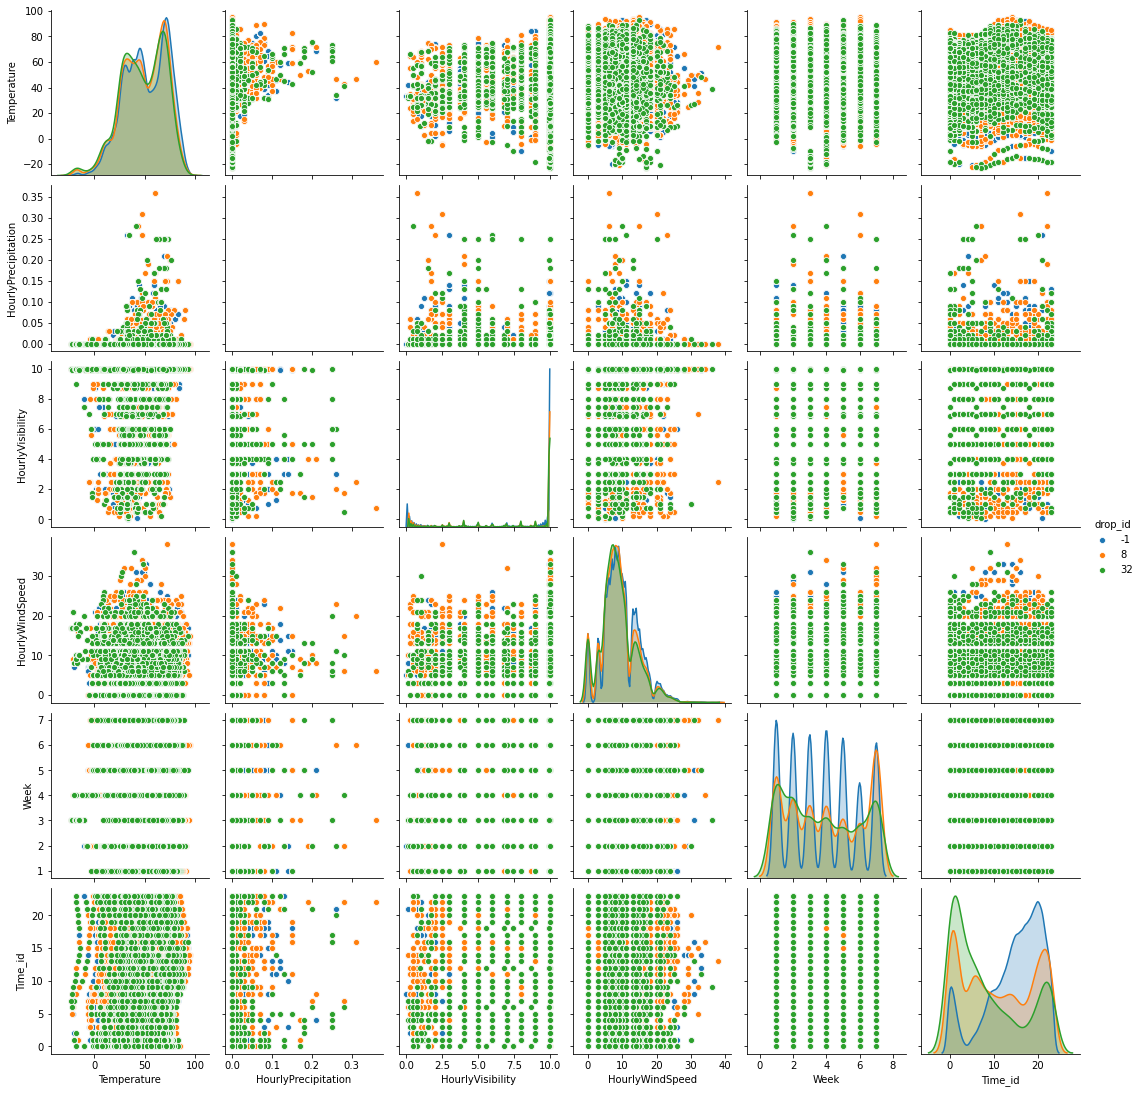

In [18]:
import seaborn as sns
fig = sns.pairplot(df.sort_values(by='drop_id', ascending=True), 
                   hue='drop_id', size=2.5);
fig

In [86]:
fig.savefig('drop_id.png') 

In [73]:
def level(x):
    if x == -1:
        return 'out'
    elif x == 8 :
        return '# 8'
    else:
        return '# 32'
df['drop_id']=df['drop_id'].apply(lambda x:level(x))

In [74]:
df

,Temperature,HourlyPrecipitation,HourlyVisibility,HourlyWindSpeed,Week,drop_id,Time_id
0,34,0.0,9.94,9,2,# 8,0
1,33,0.0,6.00,13,2,# 32,2
2,32,0.0,4.00,10,2,# 32,4
3,30,0.0,9.94,11,2,# 8,6
4,30,0.0,9.94,11,2,# 8,6
...,...,...,...,...,...,...,...
184539,28,0.0,9.94,14,2,out,18
184540,28,0.0,10.00,15,2,out,19
184541,28,0.0,10.00,15,2,out,19
184542,27,0.0,10.00,10,2,out,20


# Decision Tree

In [79]:
target.values

array([['# 8'],
       ['# 32'],
       ['# 32'],
       ...,
       ['out'],
       ['out'],
       ['out']], dtype=object)

In [83]:
target = df[['drop_id']]
inputs = df.drop(['drop_id'],axis=1)
label = ['# 8', '# 32', 'out']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    inputs, 
    target, test_size=0.3, random_state=0)
tree = DecisionTreeClassifier(max_depth=4,criterion = 'entropy', random_state=0)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
print('tree accuraccy: {}'.format(tree.score(X_test,y_test['drop_id'])))
print('number of correct sample: {}'.format(num_correct_samples))

tree accuraccy: 0.8886099270283939
number of correct sample: 49197


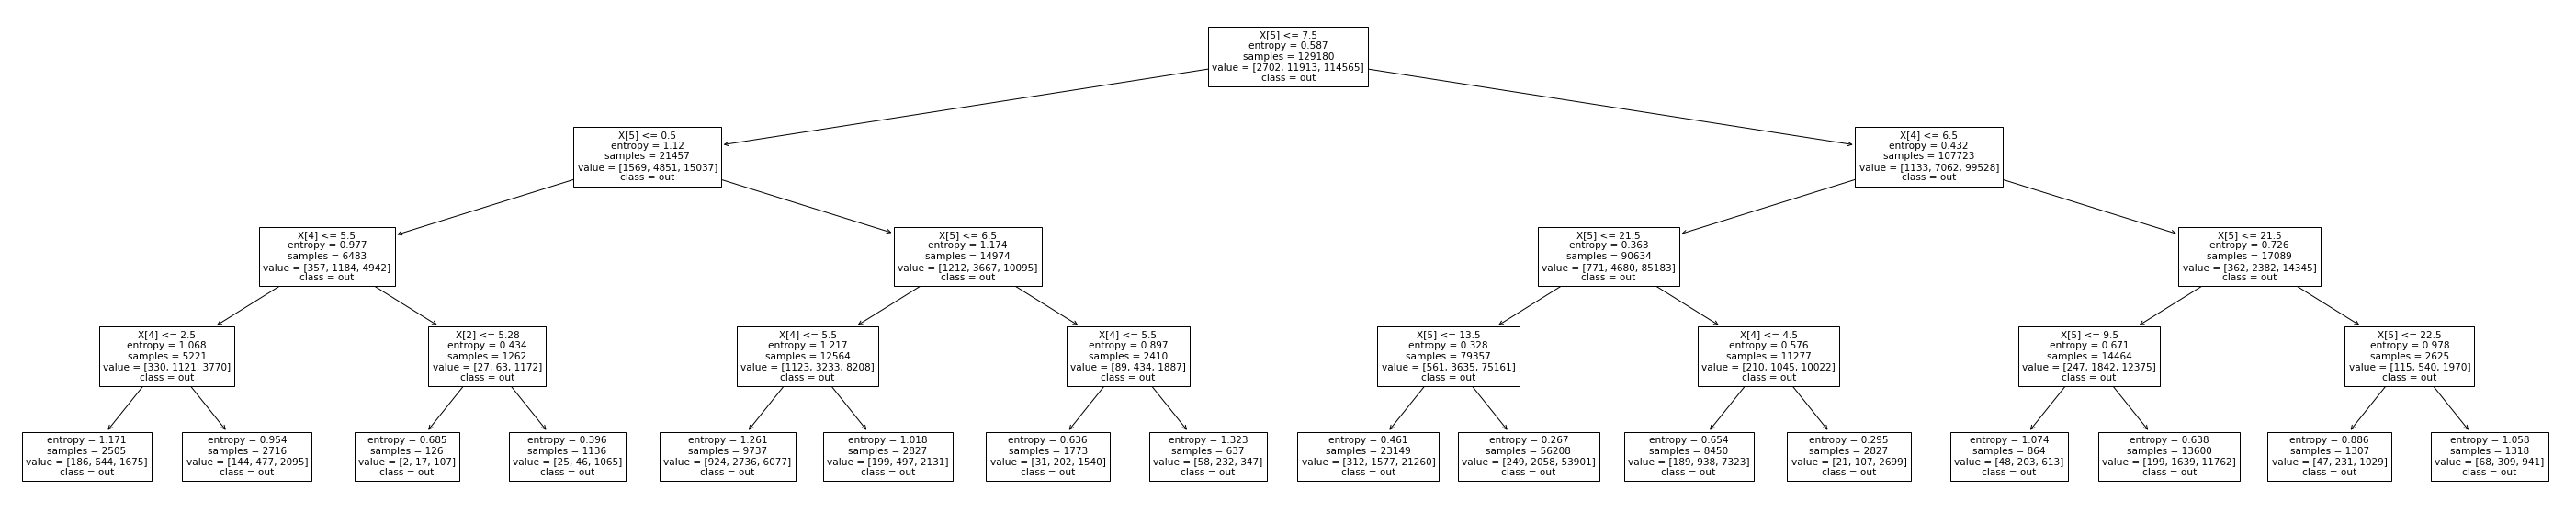

In [85]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(50,10))
plot_tree(tree, ax=ax,
          class_names=label);